<a href="https://colab.research.google.com/github/hinafarooq21/F1-Lap-Predictor--Capstone/blob/main/Track_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #pip install tensorflow
# !pip install keras
# !pip install pillow
# !pip install autokeras


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import requests
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Lambda, Concatenate
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
# Unsampling, Converting Shape from 1D --> 2D/3D
from tensorflow.keras.layers import Conv2DTranspose, Reshape

from tensorflow.keras.losses import mse

In [ ]:
df = pd.read_csv('clean_circuits_img_c.csv')

In [ ]:
df

,Image Filename,Type,Direction,Length (m),Turns,DistTurn1,Longest Straight,Elevation (m),Width (m)
0,https://storage.googleapis.com/f1-circuit-imag...,Street circuit,1,5278,16,350.00,300,2.60,14.0
1,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,1,4304,17,890.00,1200,2.80,9.0
2,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,0,4909,19,399.00,550,33.32,12.0
3,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,0,4309,15,200.00,1394,43.00,15.0
4,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,1,5793,11,638.00,1120,12.80,10.0
5,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,1,5412,15,353.00,1090,16.90,14.0
6,https://storage.googleapis.com/f1-circuit-imag...,Street circuit,0,6003,20,141.00,2200,26.80,7.6
7,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,1,4657,14,579.00,1047,29.60,11.0
8,https://storage.googleapis.com/f1-circuit-imag...,Street circuit,1,3337,19,114.00,500,42.00,7.0
9,https://storage.googleapis.com/f1-circuit-imag...,Race circuit,1,7004,20,165.00,1050,102.20,8.0


In [ ]:
# Converting Type column to numerical
df['Type'] = df['Type'].map({'Street circuit': 0, 'Race circuit': 1, 0:0, 1:1})

In [ ]:
# Normalising all the numerical values
scaler = StandardScaler()
num_cols = ['Length (m)', 'Turns', 'DistTurn1', 'Longest Straight', 'Elevation (m)', 'Width (m)']
df[num_cols] = scaler.fit_transform(df[num_cols])
numerical_cols =  ["Type", "Direction", "Length (m)", "Turns", "DistTurn1", "Longest Straight", "Elevation (m)", "Width (m)"]


## Steps to generating a racing track
1. Load in images
2. Make sure all data is numerical
3. Scale all numerical data
4. Load images and scale them to same size
3. Seperate images to train and labels to test


In [ ]:
def load_image_tf(url):
    response = requests.get(url)
    image = tf.image.decode_png(response.content, channels=3)  # Decode png image
    image = tf.image.resize(image, [128, 128]) / 255.0  # Resize and normalise
    image = tf.image.rgb_to_grayscale(image)

    return image

X_train = []
for index, row in df.iterrows():
  url = row['Image Filename']
  image_tensor = load_image_tf(url)
  X_train.append(image_tensor)

  # # View the image
  # import matplotlib.pyplot as plt
  # plt.imshow(image_tensor.numpy())
  # plt.axis("off")
  # plt.show()

In [ ]:
X_train = np.array(X_train)
y_train = df.drop('Image Filename', axis=1)

In [ ]:
# Check shape of both X train and y train
print(f"Loaded {len(X_train)} images with shape {X_train.shape}")
print(f"Track attributes shape: {y_train.shape}")
print("len(num_cols):", len(numerical_cols))


Loaded 24 images with shape (24, 128, 128, 1)
Track attributes shape: (24, 8)
len(num_cols): 8


## Using Conditional Variational Autoencoder

> Add blockquote



**Define Encoder**


In [ ]:
# Size of Latent space - balance between generalisation and details
latent_size = 6

# Input image
input_img = Input(shape=(128, 128, 1), name="image_input")
# Input track features
input_feat = Input(shape=(len(numerical_cols),), name="condition_input")  # Track attributes

In [ ]:
# Feature Extraction - Using CNN

# Extracts Low Level Features  - 32 filters
# activation = "relu" --> introduces non-linearity
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)

# Downsizing image
x = Conv2D(64, (3,3), activation='relu', padding='same', strides=(2,2))(x)


In [ ]:
# Flatten to covert image to 1d
x = Flatten()(x)
# Combine images with track features
x = Concatenate()([x, input_feat])
# Add Dense layers
x = Dense(128, activation='relu')(x)
#x = Dense(64)(x)

In [ ]:
# Probability distribution ensures diverse tracks

# Mean of latent distribution
z_mean = Dense(latent_size)(x)

# Log variance (logarithm of variance)
z_log_var = Dense(latent_size)(x)


Reparameterisation trick

In [ ]:
# Add controlled randomness
def samples(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_size), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var) * epsilon

In [ ]:
# Sample Latent Vector
z = Lambda(samples, output_shape=(latent_size,))([z_mean, z_log_var])

# Encoder model
encoder = Model([input_img, input_feat], [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 128, 128, 32)   │            320 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ conv2d_14[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 262144)         │              0 │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ condition_input           │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 262152)         │              0 │ flatten_7[0][0],       │
│ (Concatenate)             │                        │                │ condition_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_33 (Dense)          │ (None, 128)            │     33,555,584 │ concatenate_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 6)              │            774 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 6)              │            774 │ dense_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_9 (Lambda)         │ (None, 6)              │              0 │ dense_34[0][0],        │
│                           │                        │                │ dense_35[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,575,948 (128.08 MB)

 Trainable params: 33,575,948 (128.08 MB)

 Non-trainable params: 0 (0.00 B)

**Define Decoder**

In [ ]:
# Compressed representation
latent_inputs = Input(shape=(latent_size,), name="z_sampling")

# Track features
decoder_feat = Input(shape=(len(numerical_cols),), name='decoder_condition')

# Combine the 2
x = Concatenate()([latent_inputs, decoder_feat])

In [ ]:
# 1D to 3D
x = Dense(64*64*64, activation = 'relu')(x)
# Reshape to image format
x = Reshape((64, 64, 64))(x)

In [ ]:
# Unsampling
# Conv2DTranspose - Reverse of what we did earlier
x = Conv2DTranspose(32, (3,3), activation="relu", padding="same", strides=(2,2))(x)
x = Conv2DTranspose(1, (3,3), activation="sigmoid", padding="same")(x)


In [ ]:
decoder = Model([latent_inputs, decoder_feat], x, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ z_sampling (InputLayer)   │ (None, 6)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_condition         │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_19            │ (None, 14)             │              0 │ z_sampling[0][0],      │
│ (Concatenate)             │                        │                │ decoder_condition[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 262144)         │      3,932,160 │ concatenate_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_10 (Reshape)      │ (None, 64, 64, 64)     │              0 │ dense_36[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_18       │ (None, 128, 128, 32)   │         18,464 │ reshape_10[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_19       │ (None, 128, 128, 1)    │            289 │ conv2d_transpose_18[0… │
│ (Conv2DTranspose)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,950,913 (15.07 MB)

 Trainable params: 3,950,913 (15.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Defining VAE Loss
def vae_loss(t_true, t_pred):
  # k.flatter - convert to 1D
    reconstruction_loss = mse(K.flatten(t_true), K.flatten(t_pred))
    return reconstruction_loss


In [ ]:
print("Decoder expects:", decoder_feat.shape)  # Should print (None, 8)


Decoder expects: (None, 8)


In [ ]:
# Creating the VAE model

# Generated Race track image
outputs = decoder([encoder([input_img, input_feat])[2], input_feat])

vae = Model([input_img, input_feat], outputs, name="vae")
vae.compile(optimizer='adam', loss=vae_loss)

# Smaller batch size to prevent over fitting
# Larger epochs - allows more training cycles
vae.fit([X_train, y_train], X_train, epochs=15, batch_size=4)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.2446
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.2408
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.1629
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.0535
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.1035
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.1133
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.0625
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - loss: 0.0763
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0499
Epoch 10/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0598
Epoch 11/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0926
Epoch 12/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.0669
Epoch 13/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - loss: 0.0758
Epoch 14/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0745
Epoch 15/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.0582


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


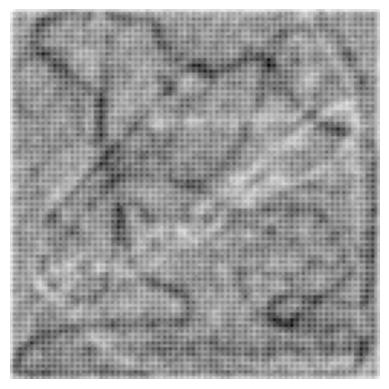

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_racetrack(length_m, turns, dist_turn1, longest_straight, elevation, width, Type, direction):
    # Normalise user inputs (make sure to use the same scaler as training)
    user_input = np.array([[Type, direction, length_m, turns, dist_turn1, longest_straight, elevation, width]])
    user_input_normalized = scaler.transform(user_input[:,2:]) # Only scale the numerical columns
    user_input_normalized = np.concatenate([user_input[:,:2], user_input_normalized], axis=1)

    # Generate a random latent vector
    latent_dim = 6
    random_latent = np.random.normal(size=(1, latent_dim))  # Latent space sample

    # Generate racetrack image using the decoder
    generated_image = decoder.predict([random_latent, user_input_normalized])
    generated_image = np.clip(generated_image, 0, 1)  # Ensure pixel values are between 0 and 1

    # Visualise the generated track
    plt.imshow(generated_image.squeeze(), cmap="gray")  # Remove channel dimension
    plt.axis("off")  # Hide axes
    plt.show()

# Example: User input to generate a new track
generate_racetrack(length_m=3000, turns=7, dist_turn1=350, longest_straight=300, elevation=2.6, width=14, Type=0, direction=1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


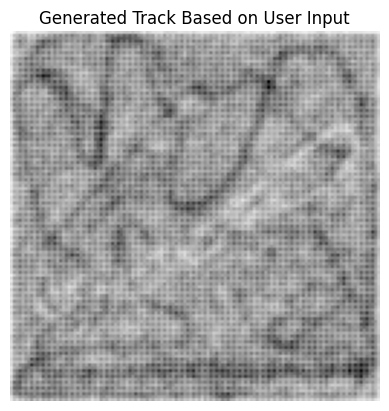

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


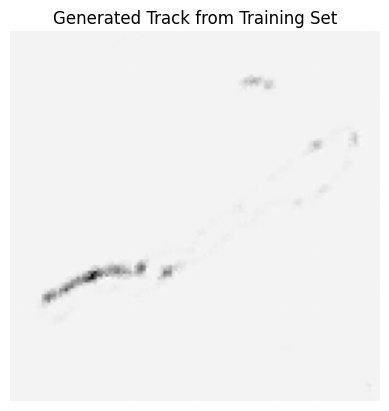

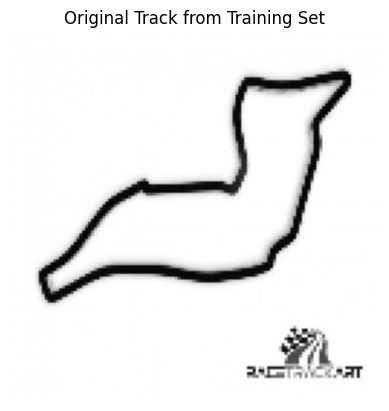

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_compare_track(length_m, turns, dist_turn1, longest_straight, elevation, width, Type, direction): # Add Type and direction
    # Step 1: Preprocess user input (normalise it using the same scaler as used during training)
    user_input = np.array([[Type, direction, length_m, turns, dist_turn1, longest_straight, elevation, width]])
    user_input_normalized = scaler.transform(user_input[:,2:])  # Only scale the numerical columns
    user_input_normalized = np.concatenate([user_input[:,:2], user_input_normalized], axis=1)  # Concatenate back Type and direction

    # Step 2: Generate a random latent vector for variability
    latent_dim = 6  # Change latent_dim to match the encoder's latent space size
    random_latent = np.random.normal(size=(1, latent_dim))  # Sample a random latent vector

    # Step 3: Generate new track based on user input and the random latent vector
    generated_image = decoder.predict([random_latent, user_input_normalized])

    # Step 4: Visualise the generated track from user input
    plt.imshow(generated_image.squeeze(), cmap="gray")  # Show the generated racetrack
    plt.title("Generated Track Based on User Input")
    plt.axis("off")
    plt.show()

    # Step 5: Select a random track from the training set to compare (for debugging)
    random_idx = np.random.randint(0, len(X_train))  # Randomly pick an index from the training data
    test_input = X_train[random_idx]  # Original image from the training set

    # Get the corresponding track parameters for this image
    test_conditions = y_train.iloc[[random_idx]].values # Get the corresponding row as a NumPy array

    # Step 6: Generate the track using the encoder and decoder for the selected training image
    latent_vector = encoder.predict([test_input[np.newaxis,...], test_conditions])[2]  # Get the latent vector from encoder, add new axis to test_input
    generated_image_from_train = decoder.predict([latent_vector, test_conditions])  # Reconstruct the image

    # Step 7: Visualise the generated track from training set for comparison
    plt.imshow(generated_image_from_train.squeeze(), cmap="gray")
    plt.title("Generated Track from Training Set")
    plt.axis("off")
    plt.show()

    # Step 8: Visualise the original track from the training set (for comparison)
    plt.imshow(test_input.squeeze(), cmap="gray")
    plt.title("Original Track from Training Set")
    plt.axis("off")
    plt.show()
    return generated_image.squeeze()

# Example: User input to generate a new track, add Type and direction
generated_track = generate_and_compare_track(5278, 5, 350, 300, 2.6, 14, 0, 1)

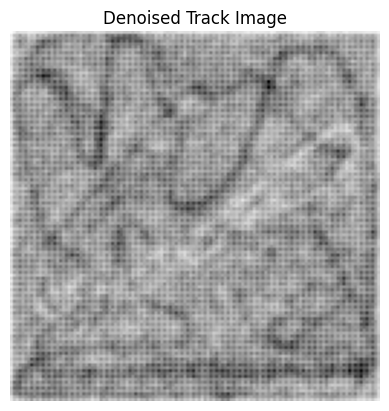

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

generated_track_255 = (generated_track * 1000).astype(np.uint8)

# Apply OpenCV’s fast denoising function
denoised_track = cv2.fastNlMeansDenoising(generated_track_255, None, h=0.5, templateWindowSize=4, searchWindowSize=2)

# Display the denoised image
plt.imshow(denoised_track, cmap='grey')
plt.title("Denoised Track Image")
plt.axis("off")
plt.show()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
torch.cuda.empty_cache()
model_id = "stabilityai/stable-diffusion-2-1"
# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "Outline of a Formula 1 circuit with the following specs: length = 5278m, Circuit type = street, Corners = 7, distance to turn 1 = 350m, width = 12m "
image = pipe(prompt, width=1000, height=1000).images[0]
plt.imshow(image)
plt.axis("off")
plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx